In [1]:
import numpy as np
import pandas as pd

In [2]:
food = pd.read_excel('/content/통합 식품영양성분DB_음식_20230313.xlsx')

In [3]:
food.head(3)

,NO,SAMPLE_ID,식품코드,DB군,상용제품,식품명,연도,지역 / 제조사,채취시기,식품대분류,...,도코사펜타에노산(22:5(n-3))(g),도코사헥사에노산(22:6(n-3))(g),트랜스 지방산(g),트랜스 올레산(18:1(n-9)t)(g),트랜스 리놀레산(18:2t)(g),트랜스 리놀렌산(18:3t)(g),회분(g),카페인(㎎),성분표출처,발행기관
0,1,D000006-94-AVG,D000006,음식,품목대표,꿩불고기,2019,충주,평균,구이류,...,0,0.02,0.1,0.02,0.05,0,5.8,-,외식영양성분자료집 통합본(2012-2017년),식품의약품안전처
1,2,D000007-ZZ-AVG,D000007,음식,품목대표,닭갈비,2019,전국(대표),평균,구이류,...,0.02,0.01,0.2,0.08,0.06,0.01,7,-,외식영양성분자료집 통합본(2012-2017년),식품의약품안전처
2,3,D000008-66-AVG,D000008,음식,품목대표,닭갈비,2019,춘천,평균,구이류,...,0.02,0.02,0.3,0.14,0.08,0.03,4.5,-,외식영양성분자료집 통합본(2012-2017년),식품의약품안전처


In [4]:
food_data = food[['식품명', '식품대분류', '식품상세분류', '1회제공량','총내용량(g)',
                  '총내용량(mL)', '에너지(㎉)', '단백질(g)', '지방(g)', '탄수화물(g)',
                  '총당류(g)', '콜레스테롤(㎎)', '총 포화 지방산(g)', '트랜스 지방산(g)']]

In [5]:
food_data.head(3)

,식품명,식품대분류,식품상세분류,1회제공량,총내용량(g),총내용량(mL),에너지(㎉),단백질(g),지방(g),탄수화물(g),총당류(g),콜레스테롤(㎎),총 포화 지방산(g),트랜스 지방산(g)
0,꿩불고기,구이류,육류구이,500,-,-,368.8,33.5,8.5,39.7,16.9,106.18,1.9,0.1
1,닭갈비,구이류,육류구이,400,-,-,595.61,45.9,25.8,44.9,21.2,193.4,6,0.2
2,닭갈비,구이류,육류구이,300,-,-,558.47,45.5,31.6,23.1,8.5,217.67,11.3,0.3


In [6]:
food_data.loc[food_data['총내용량(g)'] == '-', '총내용량(g)'] = 0
food_data.loc[food_data['총내용량(mL)'] == '-', '총내용량(mL)'] = 0

In [7]:
food_data.head(3)

,식품명,식품대분류,식품상세분류,1회제공량,총내용량(g),총내용량(mL),에너지(㎉),단백질(g),지방(g),탄수화물(g),총당류(g),콜레스테롤(㎎),총 포화 지방산(g),트랜스 지방산(g)
0,꿩불고기,구이류,육류구이,500,0,0,368.8,33.5,8.5,39.7,16.9,106.18,1.9,0.1
1,닭갈비,구이류,육류구이,400,0,0,595.61,45.9,25.8,44.9,21.2,193.4,6,0.2
2,닭갈비,구이류,육류구이,300,0,0,558.47,45.5,31.6,23.1,8.5,217.67,11.3,0.3


In [8]:
food_data['총 내용량'] = food_data['총내용량(g)'] + food_data['총내용량(mL)']

<ipython-input-8-4dbbe4ee5951>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  food_data['총 내용량'] = food_data['총내용량(g)'] + food_data['총내용량(mL)']


In [9]:
food_data = food_data.drop(['총내용량(g)', '총내용량(mL)'], axis=1)

In [10]:
food_data.head(3)

,식품명,식품대분류,식품상세분류,1회제공량,에너지(㎉),단백질(g),지방(g),탄수화물(g),총당류(g),콜레스테롤(㎎),총 포화 지방산(g),트랜스 지방산(g),총 내용량
0,꿩불고기,구이류,육류구이,500,368.8,33.5,8.5,39.7,16.9,106.18,1.9,0.1,0
1,닭갈비,구이류,육류구이,400,595.61,45.9,25.8,44.9,21.2,193.4,6,0.2,0
2,닭갈비,구이류,육류구이,300,558.47,45.5,31.6,23.1,8.5,217.67,11.3,0.3,0


In [11]:
food_data['총 내용량'] = food_data['총 내용량'].astype('int64')

In [12]:
food_data.head(3)

,식품명,식품대분류,식품상세분류,1회제공량,에너지(㎉),단백질(g),지방(g),탄수화물(g),총당류(g),콜레스테롤(㎎),총 포화 지방산(g),트랜스 지방산(g),총 내용량
0,꿩불고기,구이류,육류구이,500,368.8,33.5,8.5,39.7,16.9,106.18,1.9,0.1,0
1,닭갈비,구이류,육류구이,400,595.61,45.9,25.8,44.9,21.2,193.4,6,0.2,0
2,닭갈비,구이류,육류구이,300,558.47,45.5,31.6,23.1,8.5,217.67,11.3,0.3,0


In [13]:
from sklearn.preprocessing import LabelEncoder

columns = ['식품대분류', '식품상세분류']

for column in columns:
  le = LabelEncoder()
  food_data[column] = le.fit_transform(food_data[column].values)

In [14]:
food_data.head(3)

,식품명,식품대분류,식품상세분류,1회제공량,에너지(㎉),단백질(g),지방(g),탄수화물(g),총당류(g),콜레스테롤(㎎),총 포화 지방산(g),트랜스 지방산(g),총 내용량
0,꿩불고기,2,54,500,368.8,33.5,8.5,39.7,16.9,106.18,1.9,0.1,0
1,닭갈비,2,54,400,595.61,45.9,25.8,44.9,21.2,193.4,6,0.2,0
2,닭갈비,2,54,300,558.47,45.5,31.6,23.1,8.5,217.67,11.3,0.3,0


In [15]:
food_data = food_data.replace('-', int('0'))

In [16]:
food_data.head(3)

,식품명,식품대분류,식품상세분류,1회제공량,에너지(㎉),단백질(g),지방(g),탄수화물(g),총당류(g),콜레스테롤(㎎),총 포화 지방산(g),트랜스 지방산(g),총 내용량
0,꿩불고기,2,54,500,368.80,33.5,8.5,39.7,16.9,106.18,1.9,0.1,0
1,닭갈비,2,54,400,595.61,45.9,25.8,44.9,21.2,193.40,6.0,0.2,0
2,닭갈비,2,54,300,558.47,45.5,31.6,23.1,8.5,217.67,11.3,0.3,0


In [17]:
food_data = pd.DataFrame(food_data)
food_data.loc[food_data['총 내용량']==0, '총 내용량'] = food_data['1회제공량']

In [18]:
food_data.head(3)

,식품명,식품대분류,식품상세분류,1회제공량,에너지(㎉),단백질(g),지방(g),탄수화물(g),총당류(g),콜레스테롤(㎎),총 포화 지방산(g),트랜스 지방산(g),총 내용량
0,꿩불고기,2,54,500,368.80,33.5,8.5,39.7,16.9,106.18,1.9,0.1,500
1,닭갈비,2,54,400,595.61,45.9,25.8,44.9,21.2,193.40,6.0,0.2,400
2,닭갈비,2,54,300,558.47,45.5,31.6,23.1,8.5,217.67,11.3,0.3,300


In [19]:
food_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7704 entries, 0 to 7703
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   식품명          7704 non-null   object 
 1   식품대분류        7704 non-null   int64  
 2   식품상세분류       7704 non-null   int64  
 3   1회제공량        7704 non-null   int64  
 4   에너지(㎉)       7704 non-null   float64
 5   단백질(g)       7704 non-null   object 
 6   지방(g)        7704 non-null   float64
 7   탄수화물(g)      7704 non-null   object 
 8   총당류(g)       7704 non-null   object 
 9   콜레스테롤(㎎)     7704 non-null   float64
 10  총 포화 지방산(g)  7704 non-null   float64
 11  트랜스 지방산(g)   7704 non-null   float64
 12  총 내용량        7704 non-null   int64  
dtypes: float64(5), int64(4), object(4)
memory usage: 782.6+ KB


In [20]:
protein_idx = food_data[food_data['단백질(g)'] == '1g 미만'].index
protein_idx

Int64Index([7433, 7555, 7567], dtype='int64')

In [21]:
carbo_idx = food_data[food_data['탄수화물(g)'] == '1g 미만'].index
carbo_idx

Int64Index([7695], dtype='int64')

In [22]:
sugar_idx = food_data[food_data['총당류(g)'] == '1g 미만'].index
sugar_idx

Int64Index([7507, 7508, 7509, 7510, 7511, 7532, 7635, 7643, 7655, 7668, 7686,
            7691],
           dtype='int64')

In [23]:
food_data.loc[food_data['단백질(g)'] == '1g 미만', '단백질(g)'] = 0
food_data['단백질(g)'] = food_data['단백질(g)'].astype('float64')

In [24]:
protein_idx = food_data[food_data['단백질(g)'] == '1g 미만'].index
protein_idx

Int64Index([], dtype='int64')

In [25]:
food_data.loc[food_data['탄수화물(g)'] == '1g 미만', '탄수화물(g)'] = 0
food_data['탄수화물(g)'] = food_data['탄수화물(g)'].astype('float64')

In [26]:
carbo_idx = food_data[food_data['탄수화물(g)'] == '1g 미만'].index
carbo_idx

Int64Index([], dtype='int64')

In [27]:
food_data.loc[food_data['총당류(g)'] == '1g 미만', '총당류(g)'] = 0
food_data['총당류(g)'] = food_data['총당류(g)'].astype('float64')

In [28]:
sugar_idx = food_data[food_data['총당류(g)'] == '1g 미만'].index
sugar_idx

Int64Index([], dtype='int64')

In [29]:
food_data.head(3)

,식품명,식품대분류,식품상세분류,1회제공량,에너지(㎉),단백질(g),지방(g),탄수화물(g),총당류(g),콜레스테롤(㎎),총 포화 지방산(g),트랜스 지방산(g),총 내용량
0,꿩불고기,2,54,500,368.80,33.5,8.5,39.7,16.9,106.18,1.9,0.1,500
1,닭갈비,2,54,400,595.61,45.9,25.8,44.9,21.2,193.40,6.0,0.2,400
2,닭갈비,2,54,300,558.47,45.5,31.6,23.1,8.5,217.67,11.3,0.3,300


In [30]:
food_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7704 entries, 0 to 7703
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   식품명          7704 non-null   object 
 1   식품대분류        7704 non-null   int64  
 2   식품상세분류       7704 non-null   int64  
 3   1회제공량        7704 non-null   int64  
 4   에너지(㎉)       7704 non-null   float64
 5   단백질(g)       7704 non-null   float64
 6   지방(g)        7704 non-null   float64
 7   탄수화물(g)      7704 non-null   float64
 8   총당류(g)       7704 non-null   float64
 9   콜레스테롤(㎎)     7704 non-null   float64
 10  총 포화 지방산(g)  7704 non-null   float64
 11  트랜스 지방산(g)   7704 non-null   float64
 12  총 내용량        7704 non-null   int64  
dtypes: float64(8), int64(4), object(1)
memory usage: 782.6+ KB


In [34]:
food_data['단백질 비율'] = 100 * (food_data['단백질(g)'] / food_data['총 내용량'])

In [35]:
protein_sort = np.sort(food_data['단백질 비율'])
protein_sort_des = protein_sort[::-1]
protein_sort_des

array([92.10526316, 80.        , 77.1       , ...,  0.        ,
        0.        ,  0.        ])

In [39]:
from sklearn.cluster import KMeans
import matplotlib.pyplot  as plt
import seaborn as sns

model = KMeans(n_clusters=3, algorithm='auto')
feature = food_data[['단백질(g)', '총 내용량']]
model.fit(feature)
predict = pd.DataFrame(model.predict(feature))
predict.columns = ['predict']

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


In [40]:
r = pd.concat([feature, predict], axis=1)

In [45]:
plt.scatter(r['단백질(g)'],r['총 내용량'], c=r['predict'],alpha=0.5)

TypeError: ignored

In [ ]:
model = KMeans(n_clusters=3, algorithm='auto')
feature = food_data[['지방(g)', '총 내용량']]
model.fit(feature)
predict = pd.DataFrame(model.predict(feature))
predict.columns = ['predict']

In [ ]:
r = pd.concat([feature, predict], axis=1)

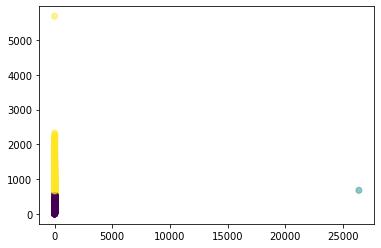

In [44]:
plt.scatter(r['지방(g)'],r['총 내용량'], c=r['predict'],alpha=0.5)

In [46]:
model = KMeans(n_clusters=3, algorithm='auto')
feature = food_data[['탄수화물(g)', '총 내용량']]
model.fit(feature)
predict = pd.DataFrame(model.predict(feature))
predict.columns = ['predict']

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


In [47]:
r = pd.concat([feature, predict], axis=1)

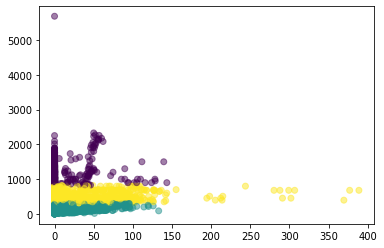

In [49]:
plt.scatter(r['탄수화물(g)'],r['총 내용량'], c=r['predict'],alpha=0.5)